<a href="https://colab.research.google.com/github/kushal2022/Pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN mostly used for images.

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper Parameters
num_epochs = 2
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range[0, 1]
# we transfrom them to tensors of normalized range[-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


torch.Size([4, 3, 32, 32]) torch.Size([4])


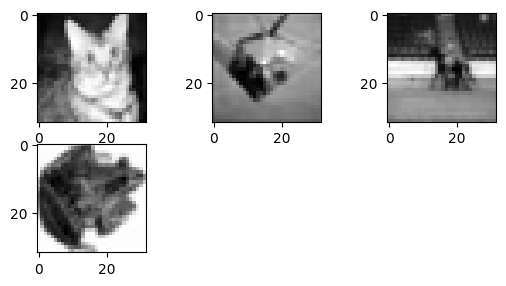

In [25]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(4):
  plt.subplot(3, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [32]:
# Model class
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    #self.conv3 = nn.Conv2d(16, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    #x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [33]:
model = ConvNet().to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [34]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(i % 2000 == 0):
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

  print('Finished Training')

  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)

      _, predicted = torch.max(outputs, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()

      for i in range(batch_size):
        label = labels[i]
        pred = predicted[i]
        if(label == pred):
          n_class_correct[label] += 1
        n_class_samples[label] += 1


    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

    for i in range(10):
      acc = 100.0 * n_class_correct[i] / n_class_samples[i]
      print(f'accuracy of {classes[i]}: {acc}%')

epoch 1 / 2, step 1/12500, loss = 2.2909
epoch 1 / 2, step 2001/12500, loss = 2.3458
epoch 1 / 2, step 4001/12500, loss = 2.2775
epoch 1 / 2, step 6001/12500, loss = 2.3125
epoch 1 / 2, step 8001/12500, loss = 2.2746
epoch 1 / 2, step 10001/12500, loss = 2.2257
epoch 1 / 2, step 12001/12500, loss = 2.2718
Finished Training
accuracy = 22.13
accuracy of plane: 53.1%
accuracy of car: 26.1%
accuracy of bird: 1.0%
accuracy of cat: 7.6%
accuracy of deer: 47.1%
accuracy of dog: 1.3%
accuracy of frog: 0.0%
accuracy of horse: 10.3%
accuracy of ship: 50.1%
accuracy of truck: 24.7%
epoch 2 / 2, step 1/12500, loss = 2.1241
epoch 2 / 2, step 2001/12500, loss = 2.0460
epoch 2 / 2, step 4001/12500, loss = 2.7242
epoch 2 / 2, step 6001/12500, loss = 1.7991
epoch 2 / 2, step 8001/12500, loss = 2.2847
epoch 2 / 2, step 10001/12500, loss = 2.3369
epoch 2 / 2, step 12001/12500, loss = 2.3776
Finished Training
accuracy = 34.12
accuracy of plane: 46.1%
accuracy of car: 27.2%
accuracy of bird: 1.7%
accuracy 